<a href="https://www.kaggle.com/code/tirendazacademy/image-classification-with-tensorflow?scriptVersionId=131951165" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Human vs Horses Classification using CNN with TensorFlow </div></b>

![](https://img.freepik.com/free-vector/horse-riding-background-design-with-sport-equipment-symbols-flat-illustration_1284-64864.jpg?w=1380&t=st=1685628545~exp=1685629145~hmac=c92f8ba8b6324aeab5e0d009100d8fe6b3e8a85f173e3760e5ba989e9e2e9bab)

Hi guys 😀 This notebook walks you through how to implement CNN with TensorFlow. 

Table of contents:
<ul>
<li><a href="#importing">Importing required libraries </a></li>  
<li><a href="#understanding">Understanding the data </a></li>  
<li><a href="#preprocessing">Data Preprocessing</a></li>   
<li><a href="#building">Model Building</a></li>      
<li><a href="#training">Model Training</a></li>   
<li><a href="#prediction">Prediction</a></li> 
<li><a href="#conclusion">Conclusion</a></li>   
</ul>

Let's dive in!

<a id='importing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Importing Required Libraries </div></b>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as implt
import seaborn as sns
sns.set_style("whitegrid")

<a id='understanding'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Understanding the data</div></b>

In [2]:
train_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/train'
val_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/validation'

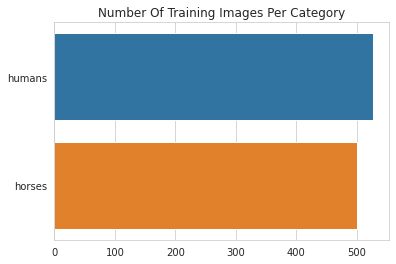

In [3]:
category_names = os.listdir(train_path) # output: ['humans', 'horses']
nb_categories = len(category_names) # output: 2
train_images = []

for category in category_names:
    folder = train_path + "/" + category
    train_images.append(len(os.listdir(folder)))

sns.barplot( x=train_images, y=category_names).set_title("Number Of Training Images Per Category");

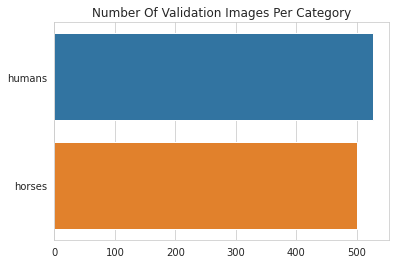

In [4]:
val_images = []
for category in category_names:
    folder = val_path + "/" + category
    val_images.append(len(os.listdir(folder)))

sns.barplot(x=train_images, y=category_names).set_title("Number Of Validation Images Per Category");

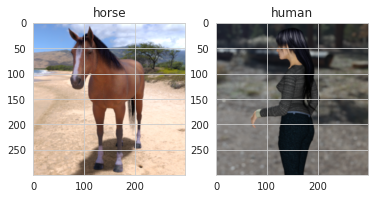

In [5]:
train_horses = "/kaggle/input/horses-or-humans-dataset/horse-or-human/train/horses"
train_humans = "/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans"

img1 = implt.imread(train_horses + "/horse02-0.png")
img2 = implt.imread(train_humans + "/human02-00.png")

plt.subplot(1, 2, 1)
plt.title('horse')
plt.imshow(img1)       
plt.subplot(1, 2, 2)
plt.title('human')
plt.imshow(img2)
plt.show()

<a id='preprocessing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Data Preprocessing </div></b>

ImageDataGenerator allows you to generate batches of tensor image data with real-time data augmentation.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = train_datagen.flow_from_directory(
        val_path,
        target_size=(300, 300),
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


<a id='building'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Model Building </div></b>

In [7]:
cnn_model = tf.keras.models.Sequential([
    # The first convolution
    layers.Conv2D(16, 3, activation='relu', input_shape=(300, 300, 3)),
    layers.MaxPooling2D(2, 2),
    # The second convolution
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    # The third convolution
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    # The fourth convolution
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    # The fifth convolution
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    layers.Flatten(),
    # 512 neuron hidden layer
    layers.Dense(512, activation='relu'),
    # Only 1 output neuron
    layers.Dense(1, activation='sigmoid')
])
     


In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [9]:
from tensorflow.keras.optimizers import RMSprop

cnn_model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

<a id='training'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Model Training</div></b>


In [10]:
history = cnn_model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/15
8/8 [==============================] - 39s 4s/step - loss: 0.8449 - acc: 0.5384 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 30s 4s/step - loss: 0.6908 - acc: 0.5261 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 3/15
8/8 [==============================] - 30s 4s/step - loss: 0.6921 - acc: 0.5406 - val_loss: 0.6881 - val_acc: 0.5117
Epoch 4/15
8/8 [==============================] - 30s 4s/step - loss: 0.6792 - acc: 0.6007 - val_loss: 0.6749 - val_acc: 0.5312
Epoch 5/15
8/8 [==============================] - 30s 4s/step - loss: 0.6371 - acc: 0.6207 - val_loss: 0.7225 - val_acc: 0.5742
Epoch 6/15
8/8 [==============================] - 31s 4s/step - loss: 0.6241 - acc: 0.6328 - val_loss: 0.7551 - val_acc: 0.5352
Epoch 7/15
8/8 [==============================] - 30s 4s/step - loss: 0.7232 - acc: 0.6618 - val_loss: 0.6608 - val_acc: 0.5039
Epoch 8/15
8/8 [==============================] - 31s 4s/step - loss: 0.5864 - acc: 0.6863 - val_loss: 1

Text(0, 0.5, 'Accuracy')

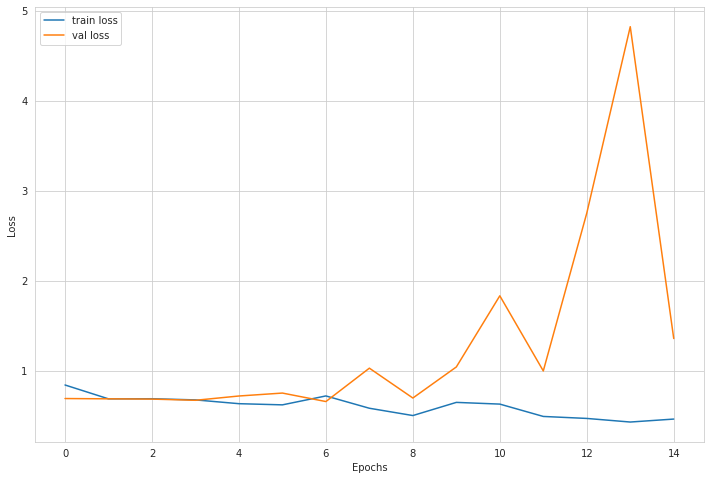

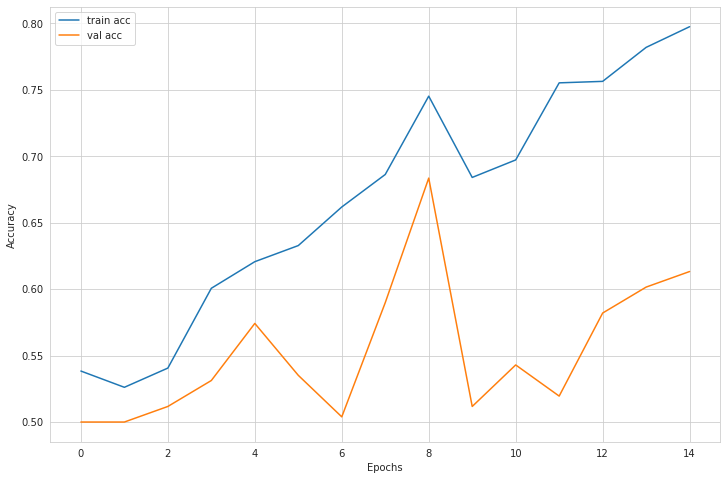

In [11]:
plt.figure(figsize = (12, 8))

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plotting the Training and Validation Accuracy
plt.figure(figsize = (12, 8))
plt.plot(history.history['acc'],label='train acc')
plt.plot(history.history['val_acc'],label='val acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

<a id='prediction'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Prediction</div></b>

In [12]:
# Creating a path variable:
path = f'{val_path}/humans/valhuman01-01.png'

# Loading the image and resizes
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

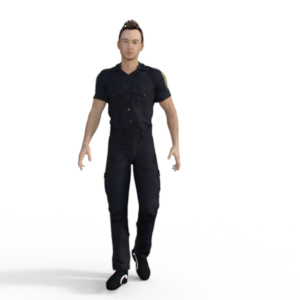

In [13]:
img

In [14]:
classes = cnn_model.predict(x)
if classes[0]>0.5:
    print(" Image is a human")
else:
    print(" Image is a horse")

 Image is a human


<a id='conclusion'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Conclusion</div></b>

In this notebook, we've seen how to build an CNN model for horse or human classification and how to predict an image with this model. Thanks for taking the time! If you enjoyed it, please consider upvoting.

🔗 Let's connect [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [Instagram](https://www.instagram.com/tirendazacademy) | [GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎

## Resource
- [AI and Machine Learning for Coders](https://www.oreilly.com/library/view/ai-and-machine/9781492078180/)